In [69]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random 

1. Let $X,$ $Y$ be two independent random variables with probability density functions:

\begin{align*}
f(x) &= \frac{1}{x},  \,\,\,\,\,\,1<x<e,\\ g(y) &= 3(y-1)^2,  \,\,\,\,\,\,1<y<2.
\end{align*}

(1) $\Pr(Y<1.5)$

(2) $\Pr(2X<Y+1)$

For each problem,
- Set $M=2000$ (the number of iteration) and $n=1000$ (the sample size).
- Display the histogram of $M$ probability estimates.
- Print the mean and standard deviation of $M$ probability estimates.

The estimate of the P(Y < 1.5) is 0.7068 and the std is 0.0146


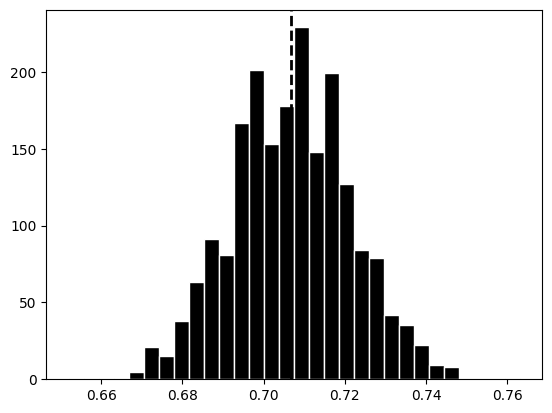

The estimate of the P(2X < Y + 1) is 0.1201 and the std is 0.0104


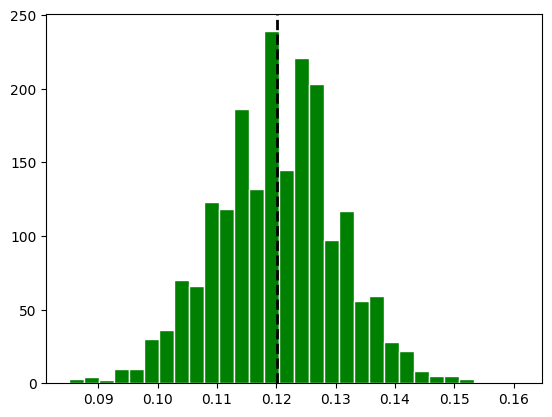

In [77]:
M = 2000
n = 1000

prob1 = [0] * M
prob2 = [0] * M
for j in range(M):
    u1 = np.random.uniform(1, np.log(1), n)
    u2 = np.random.uniform(1, 2, n)
    x = 1 / u1
    y = 3 * ((u2 - 1) ** 2)
    z = 2 * x - y

    prob1[j] = len(y[(y < 1.5)]) / n
    prob2[j] = len(z[(z < 1)]) / n

plt.hist(prob1, color='black', edgecolor='white', bins=30)
plt.axvline(np.mean(prob1), color='black', linestyle="dashed", linewidth=2)
print(f"The estimate of the P(Y < 1.5) is {np.mean(prob1):.4f} and the std is {np.std(prob1):.4f}")
plt.show()

plt.hist(prob2, color='green', edgecolor='white', bins=30)
plt.axvline(np.mean(prob2), color='black', linestyle="dashed", linewidth=2)
print(f"The estimate of the P(2X < Y + 1) is {np.mean(prob2):.4f} and the std is {np.std(prob2):.4f}")
plt.show()

2. What is the probability that	the three pieces of the randomly broken stick form an **obtuse triangle**?
	
- You should include the condition of forming a triangle along with being obtuse.
- Set $M=2000$ (the number of iteration) and $n=1000$ (the sample size)
- Display the histogram of $M$ probability estimates.
- Print the mean and standard deviation of $M$ probability estimates.

Mean for obtuse is 0.17034299999999997 and the standard deviation is 0.0119


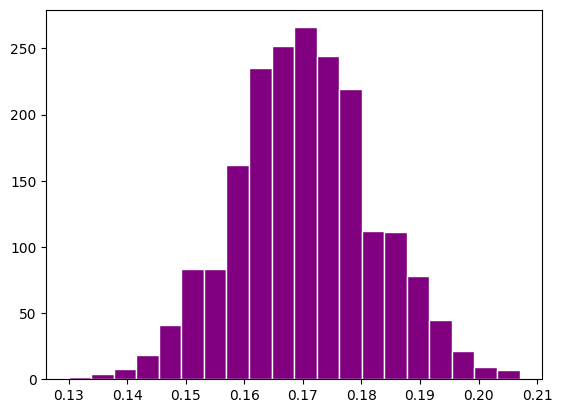

In [71]:
M = 2000
n = 1000
prob1 = [0] * M

for j in range(M):
    cnt = 0
    cnt1 = 0
    for i in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)

        a = min(x, y)
        b = max(x, y) - a
        c = 1 - max(x, y)

        s3 = max(a, b, c)
        s1 = min(a, b, c)
        s2 = 1 - s1 - s3

        if s1 + s2 > s3: # anything that satisfies the triangle : this needs to be satisfied first
            if s1 ** 2 + s2 ** 2 < s3 ** 2:
                cnt1 += 1
    prob1[j] = cnt1 / n

plt.hist(prob1, color='purple', bins=20, edgecolor='white')
print(f"Mean for obtuse is {np.mean(prob1)} and the standard deviation is {np.std(prob1):.4f}")

3. What is the probability that	the three pieces of the randomly broken stick form a triangle **with an area of less than $0.03$**?

[Hint] 
- You should include the condition of forming a triangle  along with the area criterion.
- For a triangle with the lengths of sides $a$, $b$, and $c$, the area of the triangle is given by
$$Area \,\,=\,\, \sqrt{r(r-a)(r-b)(r-c)}, \, \text{ where }\, \displaystyle r=\frac{a+b+c}{2}.$$
- Set $M=2000$ (the number of iteration) and $n=1000$ (the sample size).
- Display histogram of $M$ probability estimates.
- Print the mean and standard deviation of $M$ probability estimates.


Mean for area of less than 0.03 is 0.115843 and the std is 0.0103


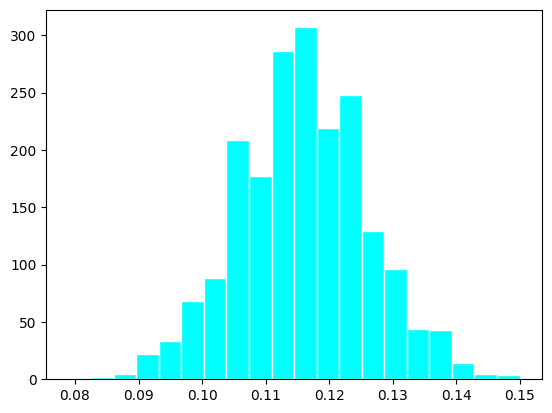

In [76]:
M = 2000
n = 1000
prob1 = [0] * M

for j in range(M):
    cnt = 0
    cnt1 = 0
    for i in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)

        a = min(x, y)
        b = max(x, y) - a
        c = 1 - max(x, y)

        s3 = max(a, b, c)
        s1 = min(a, b, c)
        s2 = 1 - s1 - s3

        if s1 + s2 > s3: # anything that satisfies the triangle : this needs to be satisfied first
            if np.sqrt(0.5 * (0.5 - s1) * (0.5 - s2) * (0.5 - s3)) < 0.03:
                cnt1 += 1
    prob1[j] = cnt1 / n

plt.hist(prob1, color='cyan', bins=20, edgecolor='white')
print(f"Mean for area of less than 0.03 is {np.mean(prob1)} and the std is {np.std(prob1):.4f}")

4. What is the probability that	the **Four pieces** of the randomly broken stick form a **quadrilateral**?

- Hint: You can use one of the following conditions:

      (a) The sum of three sides should be greater than the other side. (You have to check all four cases)
      (b) The maximum length of the side should be less than the sum of the other three sides.
  
- Set $M=2000$ (the number of iteration) and $n=1000$ (the sample size).
- Display the histogram of $M$ probability estimates.
- Print the mean and standard deviation of $M$ probability estimates.

Mean for quadilateral is 0.500124 and the std is 0.0160


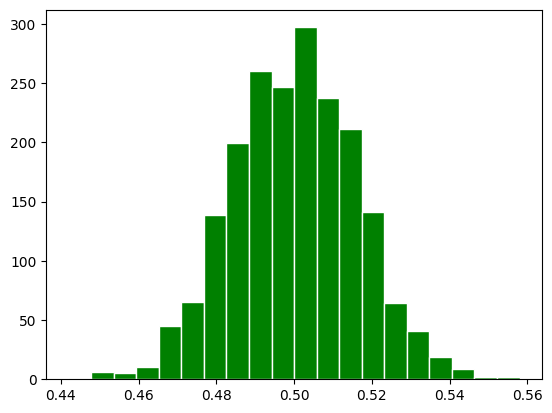

In [73]:
M = 2000
n = 1000
prob1 = [0] * M

def condition_a(a, b, c, d) -> bool:
    if a + b + c <= d or a + b + d <= c or a + c + d <= b or b + c + d <= a:
        return False
    return True

def condition_b(a, b, c, d) -> bool:
    maximum = max(a, b, c, d)
    rest = 1 - maximum
    if maximum >= rest:
        return False
    return True

for j in range(M):
    cnt = 0
    cnt1 = 0
    for i in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        z = np.random.uniform(0, 1)

        minimum = min(x, y, z)
        maximum = max(x, y, z)
        mid = 0
        if x != minimum and x != maximum:
            mid = x
        elif y != minimum and y != maximum:
            mid = y
        elif z != minimum and z != maximum:
            mid = z
        else:
            mid = minimum # when 2 mins are equal set the mid to min

        a = minimum
        b = mid - minimum
        c = maximum - mid
        d = 1 - maximum

        if condition_a(a, b, c, d) and condition_b(a, b, c, d):
            cnt1 += 1
    prob1[j] = cnt1 / n

plt.hist(prob1, color='green', bins=20, edgecolor='white')
print(f"Mean for quadilateral is {np.mean(prob1)} and the std is {np.std(prob1):.4f}")

5. Consider the following infinite series. 
$$ \sum_{n=0}^\infty \frac{1}{(n+1)^2} $$
It can be approximated by
$$ \sum_{n=0}^N \frac{1}{(n+1)^2} $$

- Set $N=20000$ (the number of terms).
- Note that this is a simple sum of a sequence. Thus, we do not need to generate random numbers.
- The theoretical value of the series is $\dfrac{\pi^2}{6}.$
- Print the approximated value of the series with the error between the approximated value and the theoretical value (six decimal places).

In [74]:
N, curr_sum = 20000, 0
for i in range(0, N + 1):
    num = 1 / ((i + 1) ** 2)
    curr_sum += num

real_value = (np.pi ** 2) / 6
err = abs(real_value - curr_sum)
print(f"The estimated value is {curr_sum:.6f}")
print(f"The error is {err:.6f}")

The estimated value is 1.644884
The error is 0.000050


6. Calculate the following integral using Monte-Carlo integral methods:

$$ \int_{0}^{10} \frac{x}{e^x-1}dx $$

- Set $M=2000$ (the number of iteration) and $n=1000$ (the sample size).
- Display the histogram of $M$ Monte-Carlo integral estimates.
- Print the mean and standard deviation of $M$ probability estimates.

The mean is 1.6439 and std is 0.07770994524953882


(array([  5.,   3.,   7.,  25.,  38.,  81., 112., 151., 213., 236., 257.,
        250., 211., 146., 123.,  65.,  34.,  25.,  13.,   5.]),
 array([1.38495322, 1.40970091, 1.4344486 , 1.45919629, 1.48394398,
        1.50869167, 1.53343936, 1.55818705, 1.58293474, 1.60768243,
        1.63243012, 1.65717781, 1.6819255 , 1.70667319, 1.73142088,
        1.75616857, 1.78091626, 1.80566395, 1.83041164, 1.85515933,
        1.87990702]),
 <BarContainer object of 20 artists>)

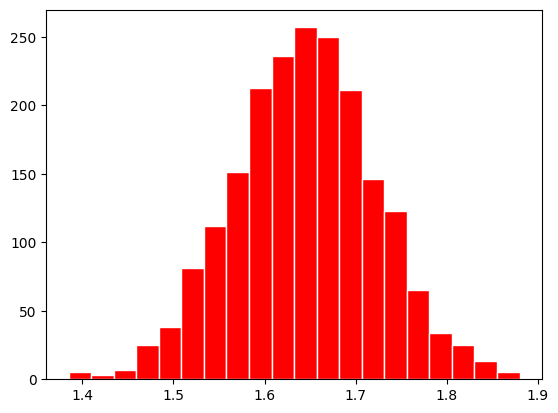

In [75]:
M, n = 2000, 1000
a, b = 0, 10
result = [0] * M

def f(x):
    return x / (np.exp(x) - 1)

for i in range(M):
    x = np.random.uniform(a, b, n)
    integral = ((b - a) / n) * sum(f(x))
    result[i] = integral

print(f"The mean is {np.mean(result):.4f} and std is {np.std(result)}")
plt.hist(result, color='red', edgecolor='white', bins=20)